In [106]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1) Dataset
Génération de données aléatoires avec une tendance linéaire avec make_regression: 
on a un dataset (x, y) qui contient 100 exemples, et une seule variable x. 
Note: chaque fois que la cellule est executée, des données différentes sont générer donc on utilise np.random.seed(0) pour reproduire le meme Dataset à chaque fois.

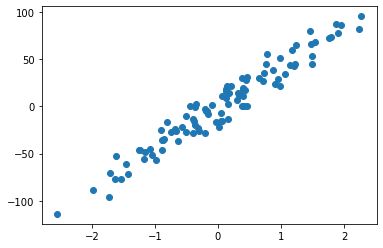

In [107]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

Pour effectuer un calcul matriciel correct, il est important de vérifier les dimensions de x et y. 
On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [108]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle de façon horizontal le vecteur x et un vecteur 1 (généré avec np.ones) de dimension égale à celle de x

In [109]:
# Ajout de la colonne de biais à x
X = np.concatenate((x, np.ones(x.shape)),axis=1)
print(X.shape)

(100, 2)


Finalement, création d'un vecteur parametre 𝜃 , initialisé avec des coefficients aléatoires. 
Ce vecteur est de dimension (2, 1). 
Si on désire toujours reproduire le meme vecteur  𝜃 , on utilise comme avant np.random.seed(0).

In [110]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1) # Création d'un vecteur paramètre theta
theta

array([[1.76405235],
       [0.40015721]])

# 2) Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas d'erreur. En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [111]:
def model(X,theta):
    return X.dot(theta)

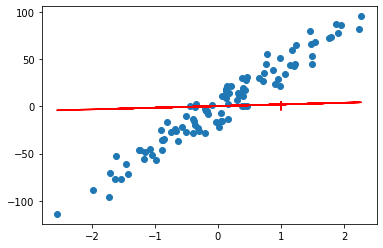

In [112]:
plt.scatter(x,y)
plt.plot(X,model(X,theta),c='r')

# 3. Fonction Cout :  Erreur Quadratique moyenne
On mesure la performance de notre modele càd les erreurs du modele sur le Dataset X, y en implémentant la métrique **(MSE : 'Erreur quadratique moyenne')**

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas d'erreurs

In [113]:
def cost_function(X,y,theta):
    m = X.shape[0]
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [114]:
cost_function(X,y,theta)

905.6306841935502

# 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$

In [115]:
def grad(X,y,theta):
    m = X.shape[0]
    return 1/m * X.T.dot(model(X,theta)-y)

In [126]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X,y,theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta,cost_history

# 5. Phase d'entrainement
Une fois les fonctions ci-dessus implémentées, il suffit d'utiliser la fonction gradient_descent en indiquant un nombre d'itérations ainsi qu'un learning rate, et la fonction retournera les paramètres du modèle après entrainement, sous forme de la variable theta_final.

On peut ensuite visualiser notre modèle grace à Matplotlib pour observer les resultats par rapport à notre Dataset

In [130]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [128]:
print(theta_final) # voici les parametres du modele une fois que la machine a été entrainée

[[42.61765864]
 [-0.81309274]]


57.08574516158981

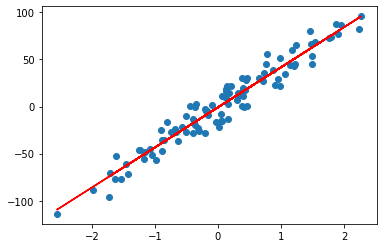

In [129]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport à notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
cost_function(X,y,theta_final)

# 6) Courbe d'apprentissage
Pour visualiser l'évaluation de la descente de gradient on peut créer un graphique qui trace la fonction cout en fonction du nombre d'itérations. Si notre descente de gradient a bien fonctionner, on doit obtenir une courbe qui diminue progressivement jusqu'à converger vers un certain minimum. Si on n'observe pas de stabilisation, alors cela signifie que le modele n'a pas terminé son apprentissage et qu'il faut soit augmenter le nombre d'itérations de la descente de gradien ou bien le pas (learning_rate)

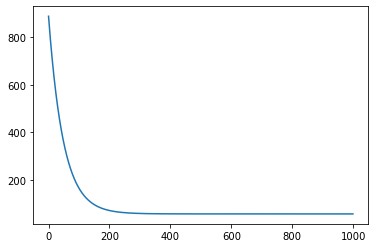

In [133]:
plt.plot(range(n_iterations),cost_history)

# 7. Evaluation finale
Pour évaluer la réelle performance de notre modele  on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés.

Sa formule est la suivante : $R^2 = {\frac{\sum (y-f(x))^2}{\sum (y- ȳ)^2} } $

Plus ce coefficient est proche de 1 plus notre modele rentre bien dans notre nuage de points càd plus performant

In [135]:
def coef_determination(y, pred):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [136]:
coef_determination(y, predictions)

0.9417294706504984